In [1]:
import os

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
import numpy as np
import pandas as pd

from kmodes.kmodes import KModes
from scipy.spatial.distance import cdist
from yellowbrick.cluster import silhouette_visualizer

## Importanto database - penguin

In [2]:
from settings import PATH, DATABASE_PATH


csv = "penguins_size.csv"

In [3]:
df = pd.read_csv(os.path.join(DATABASE_PATH, csv))
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.replace('.', float('NAN'), inplace=True)
df = df.dropna(how="all")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
df.count()

species              344
island               344
culmen_length_mm     342
culmen_depth_mm      342
flipper_length_mm    342
body_mass_g          342
sex                  333
dtype: int64

In [ ]:
df.describe(include='all')

In [6]:
#study_name = df.studyName
#sample_number = df.Sample_Number
#region = df.Region
#stage = df.Stage
species = df.species
island = df.island
culmen_length_mm = df.culmen_length_mm
culmen_depth_mm = df.culmen_depth_mm
flipper_length_mm = df.flipper_length_mm
body_mass_g = df.body_mass_g
sex = df.sex

In [7]:
sex.unique()

array(['MALE', 'FEMALE', nan], dtype=object)

In [8]:
island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [9]:
species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

### Quantidade de Pinguins por especie

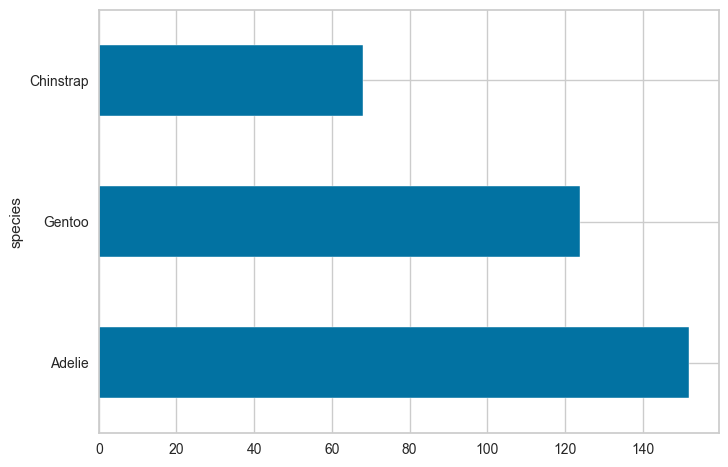

In [10]:
species.value_counts().plot(kind='barh')
plt.show()

### Quantidade de Pinguins por ilhas

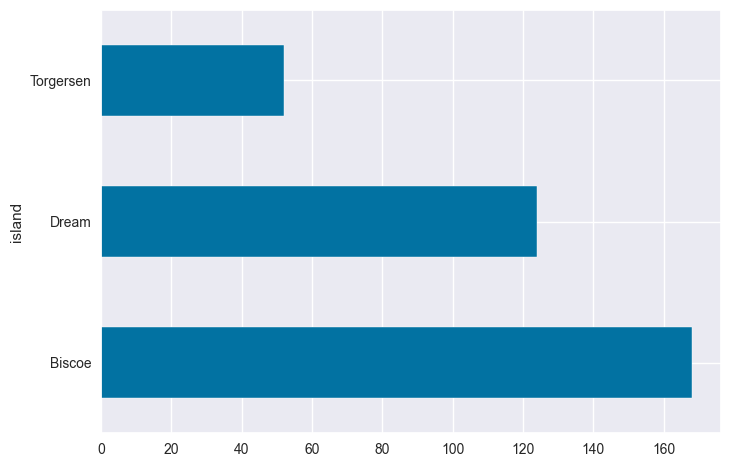

In [79]:
island.value_counts().plot(kind='barh')
plt.show()

### Correlação

<Axes: >

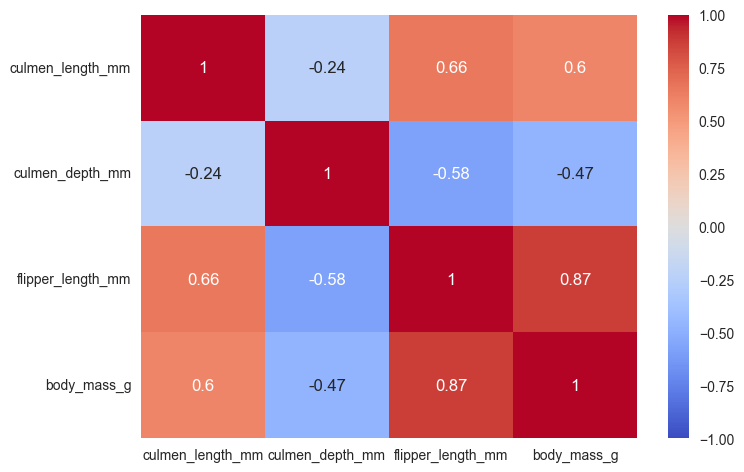

In [89]:
df_corr = pd.DataFrame(df)
df_corr.drop('sex', axis=1, inplace=True)
df_corr.drop('island', axis=1, inplace=True)
df_corr.drop('species', axis=1, inplace=True)



sns.heatmap(
    df_corr.corr(),
    cmap='coolwarm',
    center=0,
    vmin=-1,
    vmax=1,
    annot=True,)

Mostra que as correlações entre a massa corporal e o comprimente da nadadeira, são bem altas

### Sabendo qual são os maiores (mais pesados) pinguins por especie

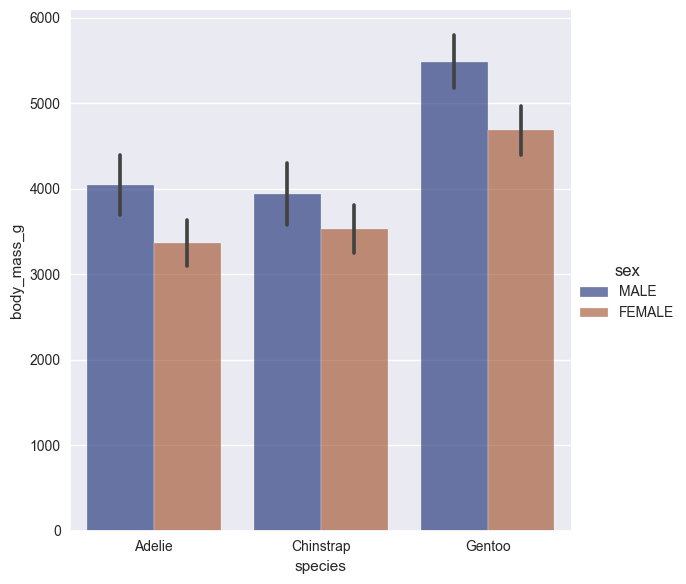

In [80]:
sns.catplot(kind="bar", x=species, y=body_mass_g, hue=sex, errorbar="sd", palette="dark", alpha=.6, height=6)

### distribuição do comprimento do culmen

<Axes: xlabel='species', ylabel='culmen_length_mm'>

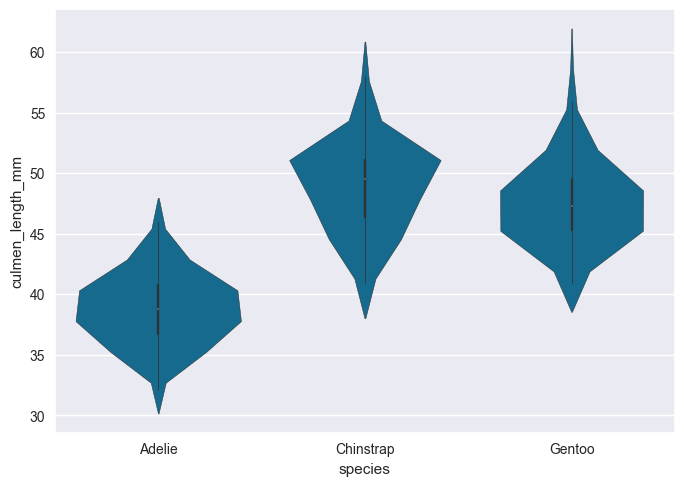

In [88]:
sns.violinplot(df, x=species, y=culmen_length_mm, gridsize=8)

### Distribuição dos dados sobre tamanho da nadeira em relação a especie e o sexo

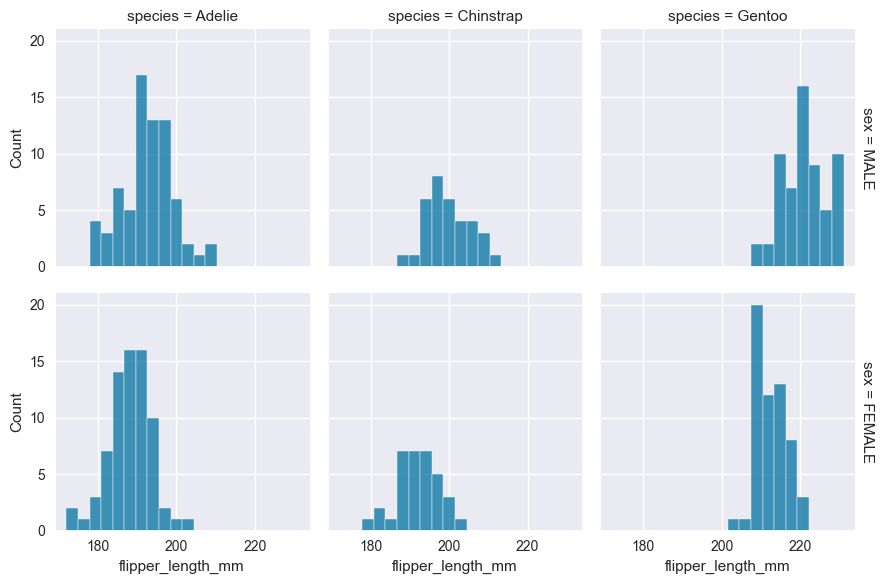

In [82]:
sns.displot(x=flipper_length_mm, col=species, row=sex, binwidth=3, height=3, facet_kws=dict(margin_titles=True),)

Os gentoo tem as maiores nadadeiras entre as 3 especies monitoradas

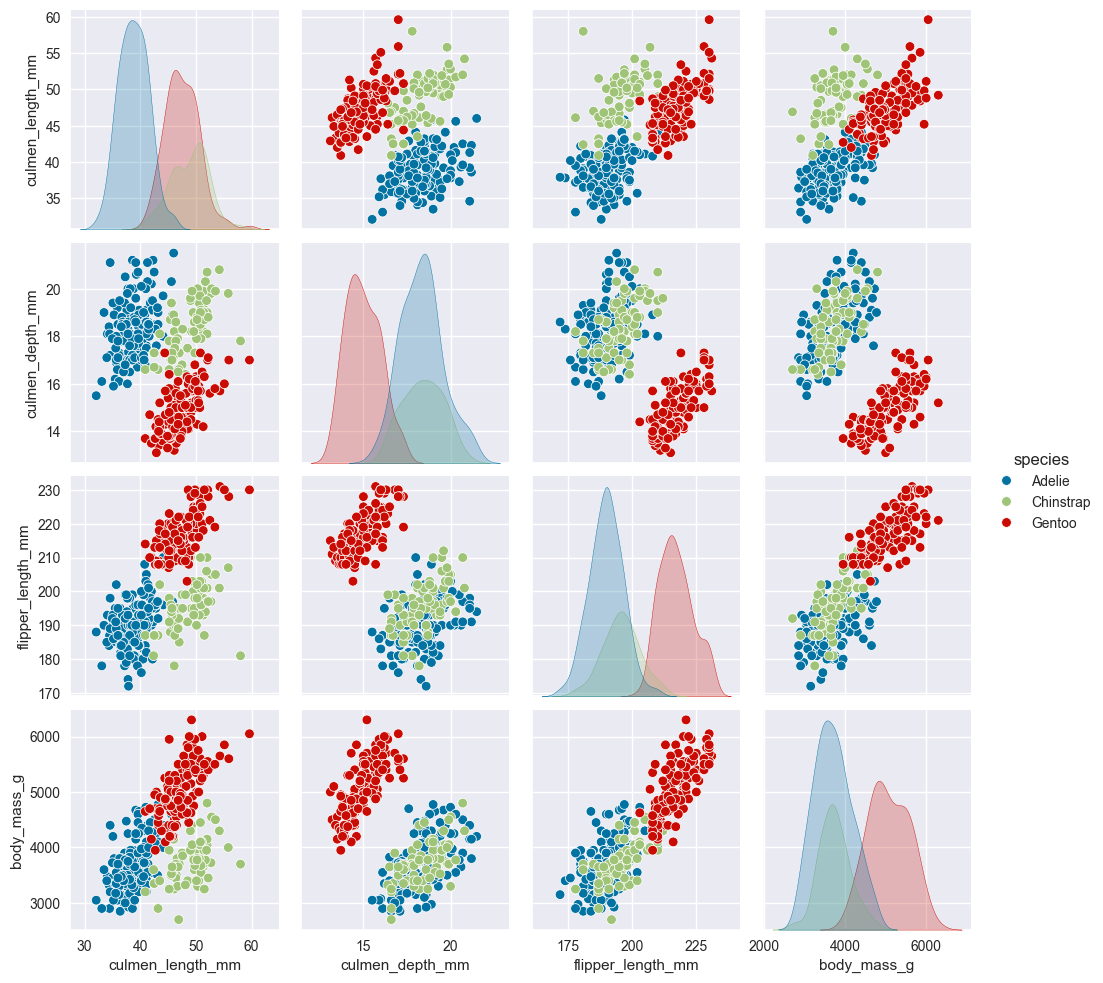

In [83]:
sns.pairplot(df, hue = 'species')
#pairplot -> uma variavel em relação as outras

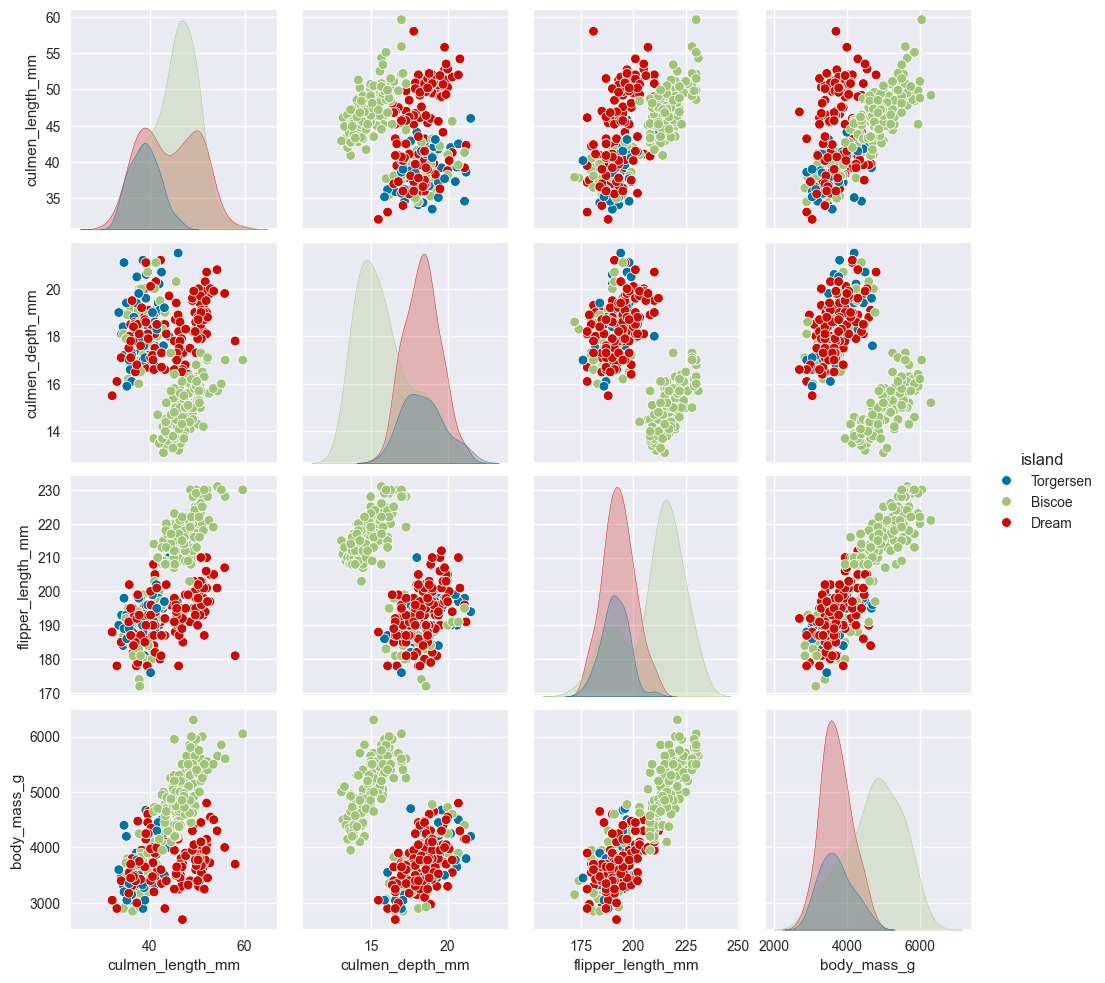

In [84]:
sns.pairplot(df, hue = 'island')

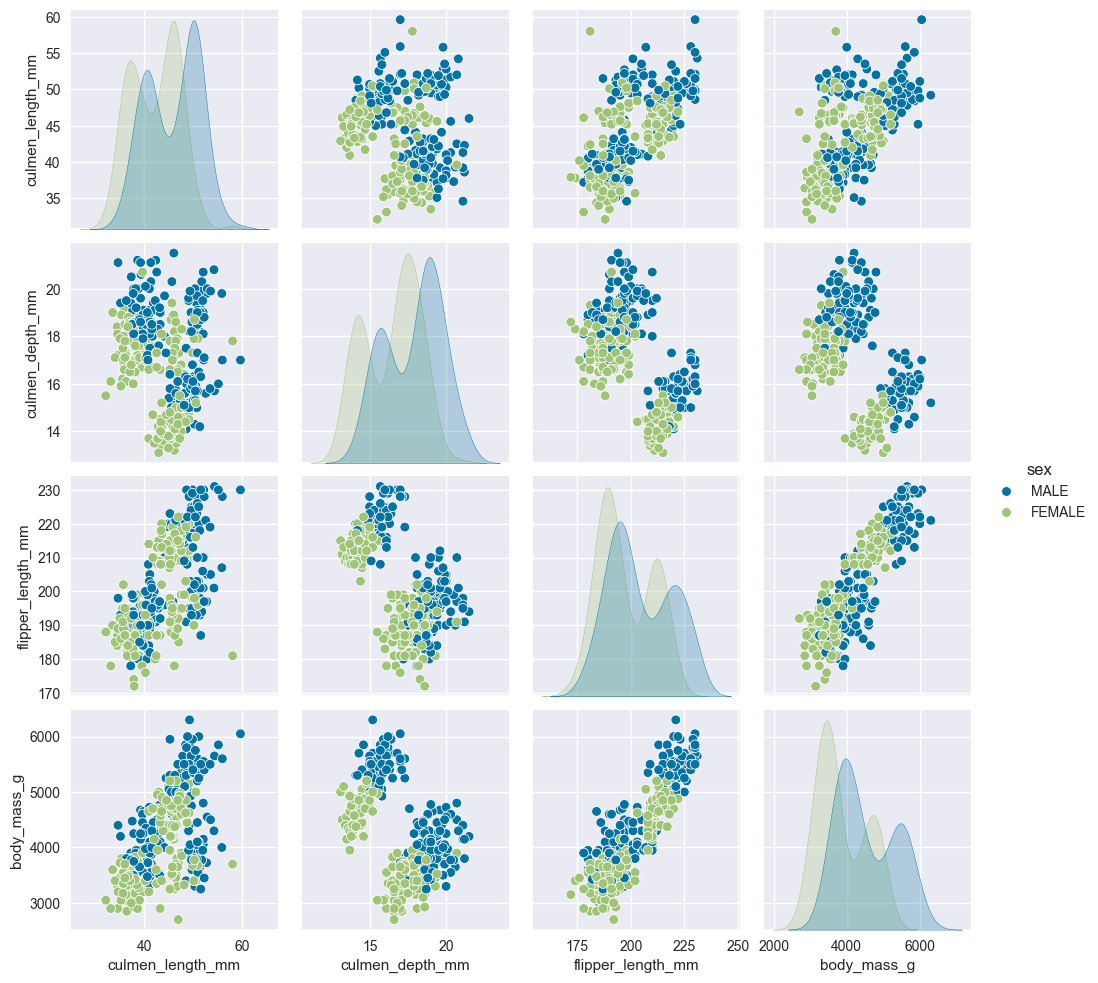

In [90]:
sns.pairplot(df, hue = 'sex')

### Número de especies por ilhas

<Axes: xlabel='island', ylabel='Count'>

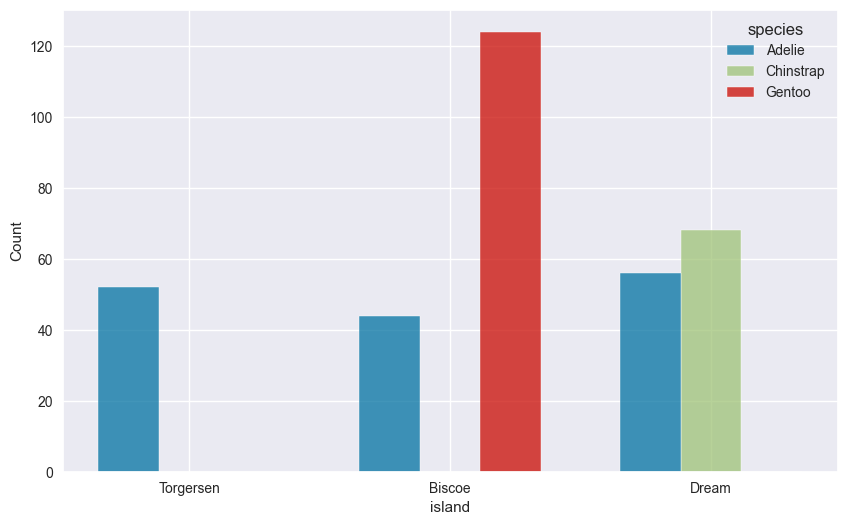

In [85]:
fig = plt.figure(figsize=(10, 6))
sns.histplot(x=island, hue=species,  multiple='dodge', shrink=.7)


### Quantidade de machos e femeas por ilhas

<Axes: xlabel='island', ylabel='Count'>

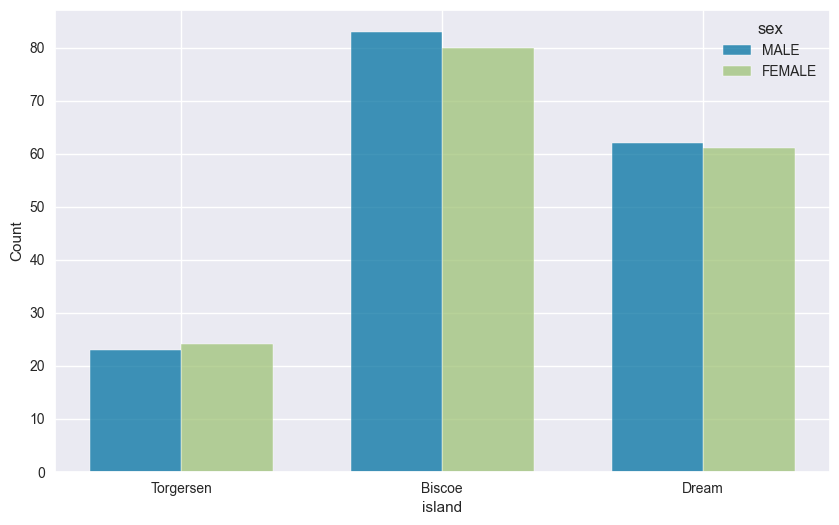

In [86]:
fig = plt.figure(figsize=(10, 6))
sns.histplot(x=island, hue=sex,  multiple='dodge', shrink=.7)

### Clustering Kmeans - Culmen length e culmen_depth

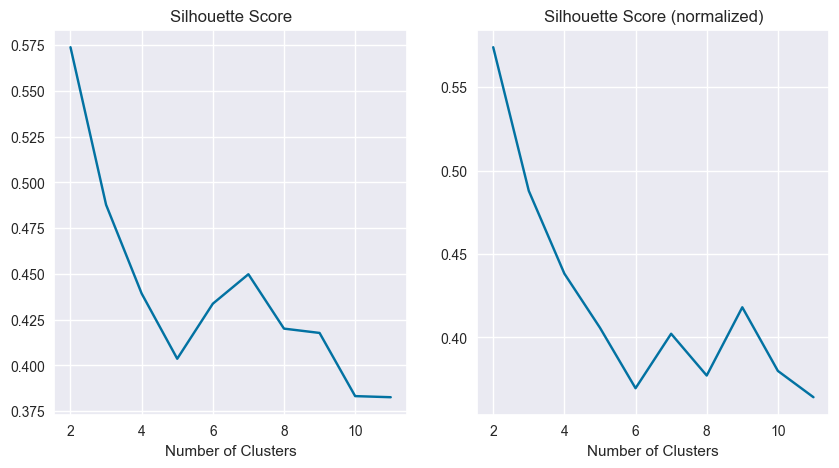

In [44]:
from sklearn.metrics import silhouette_score, silhouette_samples
df_kmeans = df.loc[:, ['culmen_length_mm', 'culmen_depth_mm']]
sil = [] #silhoeute

np.any(np.isnan(df_kmeans))
df_kmeans.dropna(inplace=True)

for i in range(2, 12):
    km = KMeans(n_clusters=i)
    km = km.fit(df_kmeans)
    sil.append(silhouette_score(df_kmeans, km.labels_))

silNorm = []
for i in range(2, 12):
    km = KMeans(n_clusters=i)
    km = km.fit(df_kmeans)
    silNorm.append(silhouette_score(df_kmeans, km.labels_))

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(range(2,12), sil)
ax1.set_title('Silhouette Score')
ax1.set_xlabel('Number of Clusters')

ax2.plot(range(2,12), silNorm)
ax2.set_title('Silhouette Score (normalized)')
ax2.set_xlabel('Number of Clusters')

plt.show()

[[0.34878361 0.63262911]
 [0.5638055  0.2340347 ]]


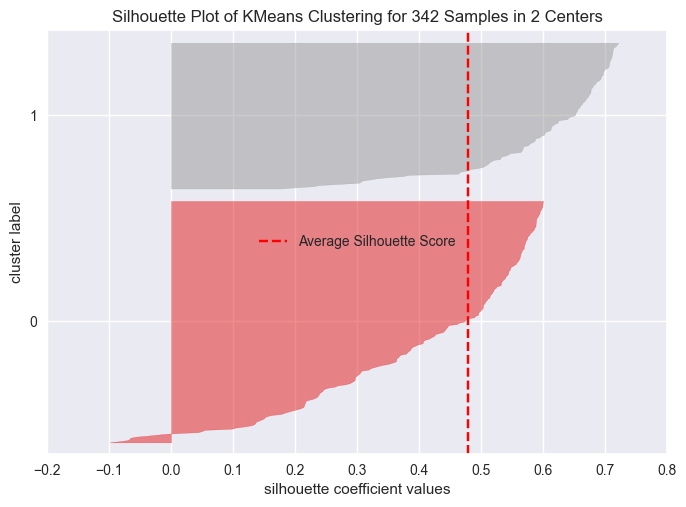

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 342 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     estimator=KMeans(n_clusters=2, random_state=42))

In [52]:
x = df_kmeans.values
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
print(kmeans.cluster_centers_)
silhouette_visualizer(KMeans(2, random_state=42), x)

[[0.24263815 0.61383442]
 [0.54744868 0.22311828]
 [0.64637762 0.66703297]]


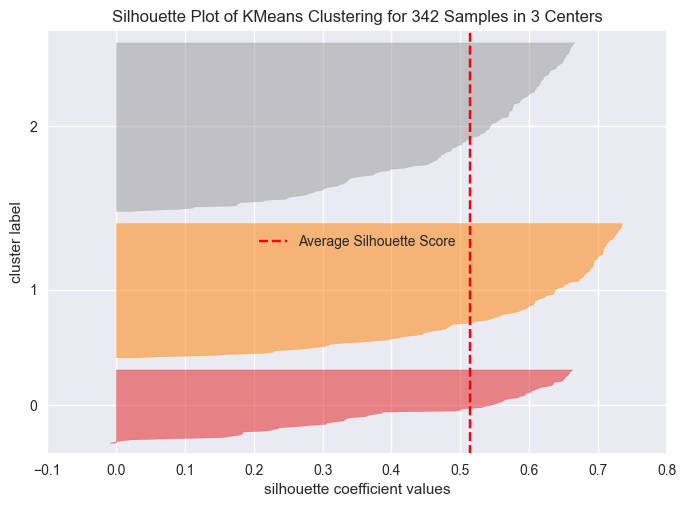

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 342 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     estimator=KMeans(n_clusters=3, random_state=42))

In [63]:
x = df_kmeans.values
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
print(kmeans.cluster_centers_)
silhouette_visualizer(KMeans(3, random_state=42), x)

[[0.4885035  0.13717949]
 [0.31706294 0.85210623]
 [0.18787879 0.48141186]
 [0.63941558 0.31568878]
 [0.25359441 0.65860806]
 [0.70498834 0.71398046]
 [0.48620321 0.53221289]]


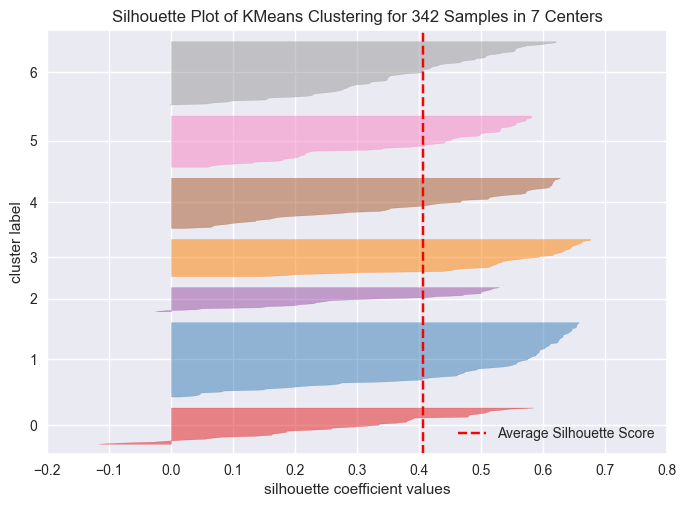

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 342 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     estimator=KMeans(n_clusters=7, random_state=42))

In [51]:
x = df_kmeans.values
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
kmeans = KMeans(n_clusters=7)
kmeans.fit(x)
print(kmeans.cluster_centers_)
silhouette_visualizer(KMeans(7, random_state=42), x)

## Clustering usando apenas dados categoricos

In [55]:
df_categories = pd.DataFrame(df)
df_categories.drop('culmen_length_mm', axis=1, inplace=True)
df_categories.drop('culmen_depth_mm', axis=1, inplace=True)
df_categories.drop('flipper_length_mm', axis=1, inplace=True)
df_categories.drop('body_mass_g', axis=1, inplace=True)

df_categories.dropna(inplace=True)
df_categories.head()

,species,island,sex
0,Adelie,Torgersen,MALE
1,Adelie,Torgersen,FEMALE
2,Adelie,Torgersen,FEMALE
4,Adelie,Torgersen,FEMALE
5,Adelie,Torgersen,MALE


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 522.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 522.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 522.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 522.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 522.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 100, cost: 302.0
Run 1, iteration: 2/100, moves: 47, cost: 302.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 87, cost: 302.0
Run 2, iteration: 2/100, moves: 48, co

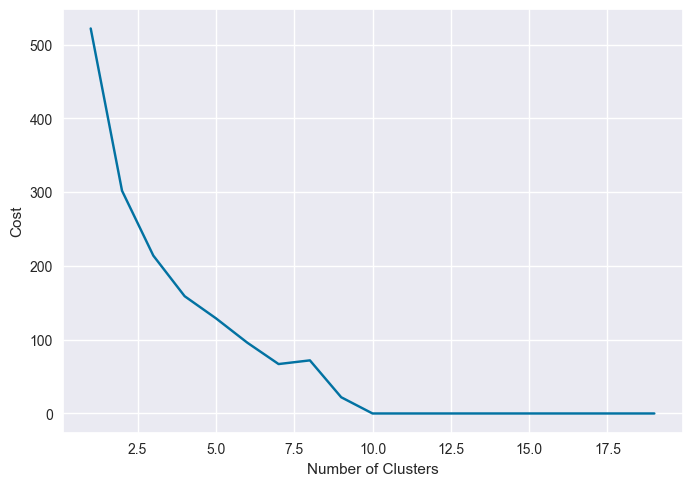

In [57]:
cost = []
K = range(1, 20)
for num_cluster in list(K):
    kmodes = KModes(n_clusters=num_cluster, init="random", n_init=5, verbose=1)
    kmodes.fit_predict(df_categories)
    cost.append(kmodes.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.show()

In [61]:
data = df_categories
km = KModes(n_clusters=7, init="huang", n_init=10, verbose=1)
clusters = km.fit_predict(data)

print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 22, cost: 68.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 72.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 22, cost: 80.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 73.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 84.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 79.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 0, cost: 81.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, iteration: 1/100, moves: 28, 